<a href="https://colab.research.google.com/github/Satyake/Time-Series-Analysis-spagheti-code/blob/master/RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 

In [227]:
df=pd.read_csv('/content/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)

In [176]:
df.rename(columns={'S4248SM144NCEN':'sales'},inplace=True)

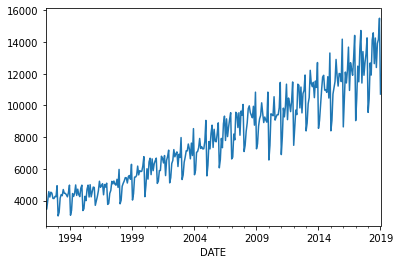

In [117]:
df['sales'].plot()

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [8]:
decomposed=seasonal_decompose(df['sales'])

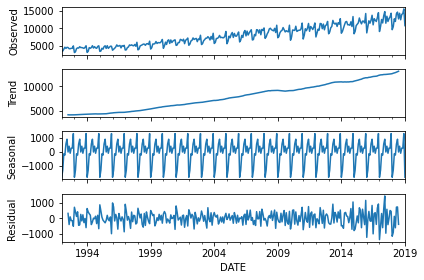

In [9]:
decomposed.plot();

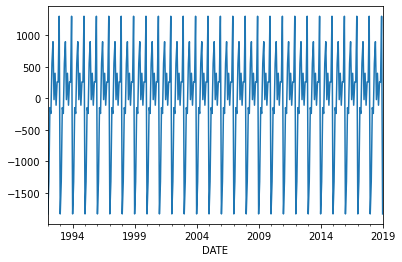

In [18]:
decomposed.seasonal.plot()

In [167]:
len(df)

325

KeyError: ignored

In [230]:
data=df.iloc[:,[0]].values

In [237]:
data.shape

(325, 1)

In [238]:
train=data[:312]
test=data[312:]

In [239]:
len(data)

325

In [ ]:
from sklearn.model_selection import train_test_split


56

array([0.41071429, 1.        , 0.03571429, 0.23214286, 0.25      ])

,sales
DATE,
1992-01-01,3459
1992-02-01,3458
1992-03-01,4002
1992-04-01,4564
1992-05-01,4221


In [240]:
train.shape

(312, 1)

In [ ]:
scaled_train=scaler.fit_transform(train)
scaled_test=scaler.fit_transform(test)

In [209]:
train=np.array(train)
test=np.array(test)

In [279]:
len(test)

13

In [215]:
train.shape

(224,)

In [221]:
train[223]

9273

In [241]:
x_train=[]
y_train=[]
for i in range(10,312):
  x_train.append(train[i-10:i,0])
  y_train.append(train[i,0])
x_train,y_train=np.array(x_train),np.array(y_train)

In [278]:
x_train.shape


(302, 10, 1)

In [259]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


IndexError: ignored

In [261]:
x_train.shape

(302, 10, 1)

In [60]:
#keras time serries object
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
#ta,t2,t3 ,t4 .etc

In [99]:
generator=TimeseriesGenerator(scaled_train,scaled_train,length=12,batch_size=1)

In [100]:
len(generator)

213

In [101]:
x,y=generator[0] #tupple unpacking to extract the training sequences and labels

In [85]:
x.shape

(1, 10, 1)

In [102]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
n_features=1
n_input=12

In [262]:
model=Sequential()
model.add(LSTM(150,activation='relu',return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(150,activation='relu',return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam',metrics='mean_squared_error',loss='mse')

In [281]:
model.fit(x_train,y_train,epochs=10,batch_size=1)

Epoch 1/10
302/302 [==============================] - 3s 11ms/step - loss: 815407.3125 - mean_squared_error: 815407.3125
Epoch 2/10
302/302 [==============================] - 3s 11ms/step - loss: 786180.6875 - mean_squared_error: 786180.6875
Epoch 3/10
302/302 [==============================] - 3s 12ms/step - loss: 955481.6250 - mean_squared_error: 955481.6250
Epoch 4/10
302/302 [==============================] - 4s 12ms/step - loss: 759374.4375 - mean_squared_error: 759374.4375
Epoch 5/10
302/302 [==============================] - 3s 12ms/step - loss: 780545.0625 - mean_squared_error: 780545.0625
Epoch 6/10
302/302 [==============================] - 3s 11ms/step - loss: 727133.6250 - mean_squared_error: 727133.6250
Epoch 7/10
302/302 [==============================] - 3s 12ms/step - loss: 728339.7500 - mean_squared_error: 728339.7500
Epoch 8/10
302/302 [==============================] - 3s 11ms/step - loss: 643959.0000 - mean_squared_error: 643959.0000
Epoch 9/10
302/302 [============

In [290]:
x_test=[]
y_test=[]
for i in range(10,23):
  x_test.append(test[i-10:i,0])
#  y_test.append(test[i,0])
x_test=np.array(x_test)
x_test=x_test.reshape(-1,1)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [293]:
x_test.shape

(13, 1, 1)

ValueError: ignored

In [288]:
x_test.shape

(13,)

In [276]:
x_test.shape[1]

IndexError: ignored

In [ ]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))


In [265]:
len(test)

13

In [104]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit_generator(generator,epochs=25)

In [106]:
model.history.history.keys()

dict_keys(['loss', 'mean_squared_error'])

In [108]:
scaled_test.shape

(100, 1)

In [111]:
evaluation=scaled_test[-12:]
first_eval=evaluation.reshape((1,n_input,n_features))

In [112]:
model.predict(first_eval)

array([[0.49567237]], dtype=float32)

In [114]:
test_predictions=[]
first_eval=scaled_train[n_input:]
current_batch=first_eval.reshape((1,n_input,n_features))

ValueError: ignored